In [1]:
#face recognition 

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


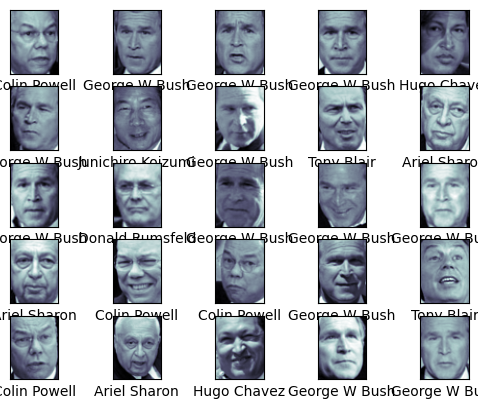

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [7]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearch

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,
                                          random_state=42)
param_grid={'svc__c':[1,5,10,50],
'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain,ytrain)
print(grid.best_params_)

model = grid.best_estimator_
yfit = model.predict(Xtest)

ImportError: cannot import name 'GridSearch' from 'sklearn.model_selection' (C:\Python 39\lib\site-packages\sklearn\model_selection\__init__.py)